In [45]:
from des_helpers import dpa_select_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
trace_df = pd.read_csv("processed_trace_data.csv")

# Constants
NUM_KEYS = 64  # Keys range from 0 to 63
kc = 60  # Known correct key index
ciphertexts = trace_df['Ciphertext']

V_map = {}

for i in range(NUM_KEYS):
	print(f"Precomputed select function for key: {i}")
	V_map[i] = np.array([dpa_select_function(ct.upper(), i) for ct in ciphertexts])

# Compute confusion coefficients k, K, and K*
def compute_confusion_coefficients(kc, ciphertexts):
	# Initialize confusion vector and matrices
	K = np.zeros((NUM_KEYS-1, NUM_KEYS-1))  # Confusion matrix K
	
	# Compute V|kc
	V_kc = V_map[kc]
	
	for kgi in range(NUM_KEYS):  # Iterate over candidate keys kgi
		V_kgi = V_map[kgi]
		if kgi == kc:
			continue

		for kgj in range(NUM_KEYS):  # Iterate over candidate keys kgj
			print(f"k_gi={kgi}, k_gj={kgj}")
			V_kgj = V_map[kgj]
			if kgj == kc:
				continue
			
			three_way_kappa = 0.5*(np.mean((V_kc - V_kgi) ** 2) + np.mean((V_kc - V_kgj) ** 2) - np.mean((V_kgi - V_kgj) ** 2))

			i = kgi if kgi < kc else kgi-1
			j = kgj if kgj < kc else kgj-1
			
			K[i, j] = three_way_kappa  # K(kc, kgi, kgj)
	
	return K

# Compute confusion coefficients
K = compute_confusion_coefficients(kc, ciphertexts)

Precomputed select function for key: 0
Precomputed select function for key: 1
Precomputed select function for key: 2
Precomputed select function for key: 3
Precomputed select function for key: 4
Precomputed select function for key: 5
Precomputed select function for key: 6
Precomputed select function for key: 7
Precomputed select function for key: 8
Precomputed select function for key: 9
Precomputed select function for key: 10
Precomputed select function for key: 11
Precomputed select function for key: 12
Precomputed select function for key: 13
Precomputed select function for key: 14
Precomputed select function for key: 15
Precomputed select function for key: 16
Precomputed select function for key: 17
Precomputed select function for key: 18
Precomputed select function for key: 19
Precomputed select function for key: 20
Precomputed select function for key: 21
Precomputed select function for key: 22
Precomputed select function for key: 23
Precomputed select function for key: 24
Precompute

In [46]:
import pickle

# Save the arrays using pickle
def save_confusion_data_pickle(K, output_path="confusion_Kc.pkl"):
	with open(output_path, "wb") as f:
		pickle.dump(K, f)
	print(f"Confusion data saved to {output_path}")

# Load the arrays using pickle
def load_confusion_data_pickle(input_path="confusion_Kc.pkl"):
	with open(input_path, "rb") as f:
		data = pickle.load(f)
	print(f"Confusion data loaded from {input_path}")
	return data

# Save the computed data
save_confusion_data_pickle(K, f"confusion_Kc={kc}.pkl")

Confusion data saved to confusion_Kc=60.pkl


Confusion data loaded from confusion_Kc=60.pkl


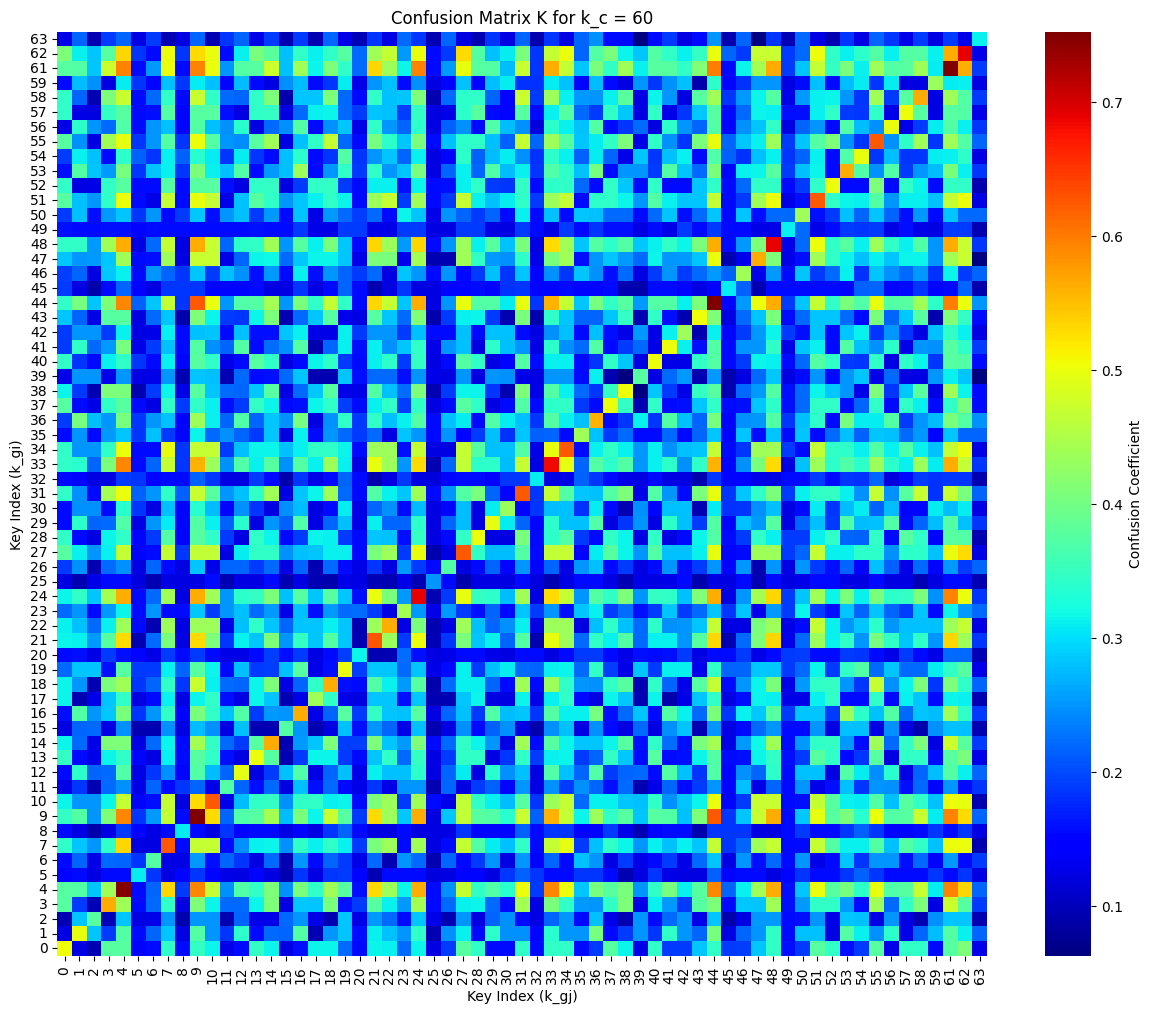

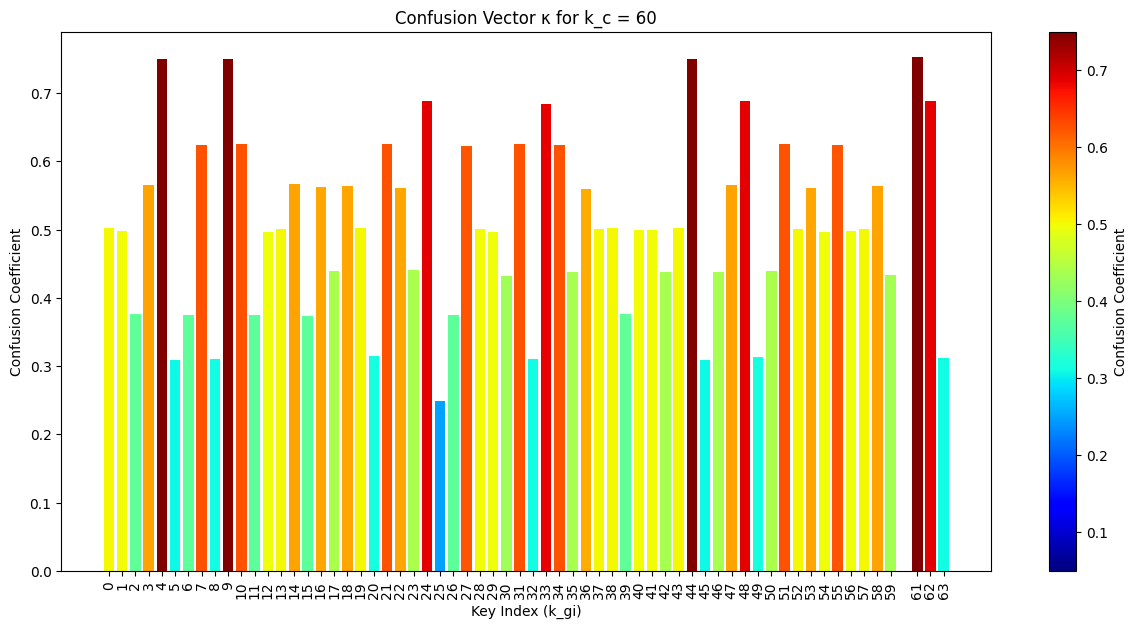

In [47]:
from matplotlib import cm
from matplotlib.colors import Normalize

# Load confusion matrix K
K = load_confusion_data_pickle(input_path="confusion_Kc=60.pkl")

k_c = 60  # Define k_c
n_keys = K.shape[0]  # Assuming K is square

# Create custom labels
true_labels = [i for i in range(NUM_KEYS) if i != kc]
tick_positions = np.arange(n_keys) + 0.5

# Visualize confusion matrix K with flipped y-axis and custom color scale
plt.figure(figsize=(15, 12))
sns.heatmap(K, annot=False, fmt=".2f", cmap="jet", cbar_kws={'label': 'Confusion Coefficient'})

# Adjust axis labels
plt.xticks(ticks=tick_positions, labels=true_labels, rotation=90)  # Adjust x-axis labels
plt.yticks(ticks=tick_positions, labels=true_labels, rotation=0)   # Adjust y-axis labels

# Title and labels
plt.title(f"Confusion Matrix K for k_c = 60")
plt.xlabel("Key Index (k_gj)")
plt.ylabel("Key Index (k_gi)")

# Flip y-axis
plt.gca().invert_yaxis()

plt.show()


# Visualize the confusion vector κ
confusion_vector = np.diag(K)

# Normalize and apply colormap
norm = Normalize(vmin=0.05, vmax=0.75)
colormap = cm.jet
colors = colormap(norm(confusion_vector))

# Bar chart
plt.figure(figsize=(15, 7))
plt.bar(true_labels, confusion_vector, color=colors, align='center')  # Align bars at the center

# Add labels and title
plt.title(f"Confusion Vector κ for k_c = 60")
plt.xlabel("Key Index (k_gi)")
plt.ylabel("Confusion Coefficient")

# Add color bar
sm = cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])  # Only for display
plt.colorbar(sm, ax=plt.gca(), label='Confusion Coefficient')

# Adjust x-axis labels for the bar graph
plt.xticks(ticks=true_labels, labels=true_labels, rotation=90)

plt.show()